# Loan Prediction Problem from datahack.analyticsvidhya.com

## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Given below is the description for each variable.

| Variable | Description |
| -------- | ----------- |
| Loan_ID | Unique Loan ID |
| Gender | Male/ Female |
| Married | Applicant married (Y/N) |
| Dependents | Number of dependents |
| Education | Applicant Education (Graduate/Under Graduate) |
| Self_Employed | Self employed (Y/N) |
| ApplicantIncome | Applicant income |
| CoapplicantIncome | Coapplicant income |
| LoanAmount | Loan amount in thousands |
| Loan_Amount_Term | Term of loan in months |
| Credit_History | Credit history meets guidelines |
| Property_Area | Urban/ Semi Urban/ Rural |
| Loan_Status | Loan approved (Y/N) |


In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("./../dataset/train.csv") 
test=pd.read_csv("./../dataset/test.csv")

In [3]:
# Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.
train_original=train.copy() 
test_original=test.copy()

### Understanding the data

In [4]:
'''
In this section, we will look at the structure of the train and test datasets. 
Firstly, we will check the features present in our data and then we will look at their data types.
'''
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset, which we have predict in the test dataset

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
337,LP002112,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural,Y
206,LP001693,Female,No,0,Graduate,No,3244,0.0,80.0,360.0,1.0,Urban,Y
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
319,LP002050,Male,Yes,1,Graduate,Yes,10000,0.0,155.0,360.0,1.0,Rural,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
537,LP002738,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,Y
149,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
580,LP002892,Male,Yes,2,Graduate,No,6540,0.0,205.0,360.0,1.0,Semiurban,Y
65,LP001225,Male,Yes,0,Graduate,No,5726,4595.0,258.0,360.0,1.0,Semiurban,N


In [8]:
train.shape, test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

In [9]:
# first drop Loan_ID feature from training and test dataset
train = train.drop(columns=['Loan_ID'])
test = test.drop(columns=['Loan_ID'])

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)


numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


### Univariate Analysis

It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use **frequency table or bar plots** which will calculate the number of each category in a particular variable. For numerical features, **probability density plots** can be used to look at the distribution of the variable.

Target Variable
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Text(0, 0.5, 'Count')

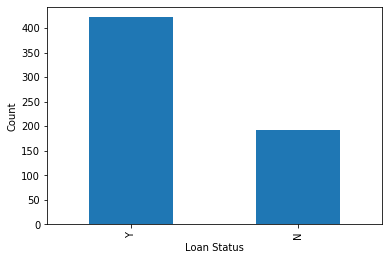

In [12]:
train['Loan_Status'].value_counts().plot.bar()
plt.xlabel('Loan Status')
plt.ylabel('Count')

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

***Categorical features:*** These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

***Ordinal features:*** Variables in categorical features having some order involved (Dependents, Education, Property_Area)

***Numerical features:*** These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

#### Independent Variable (Ordinal)

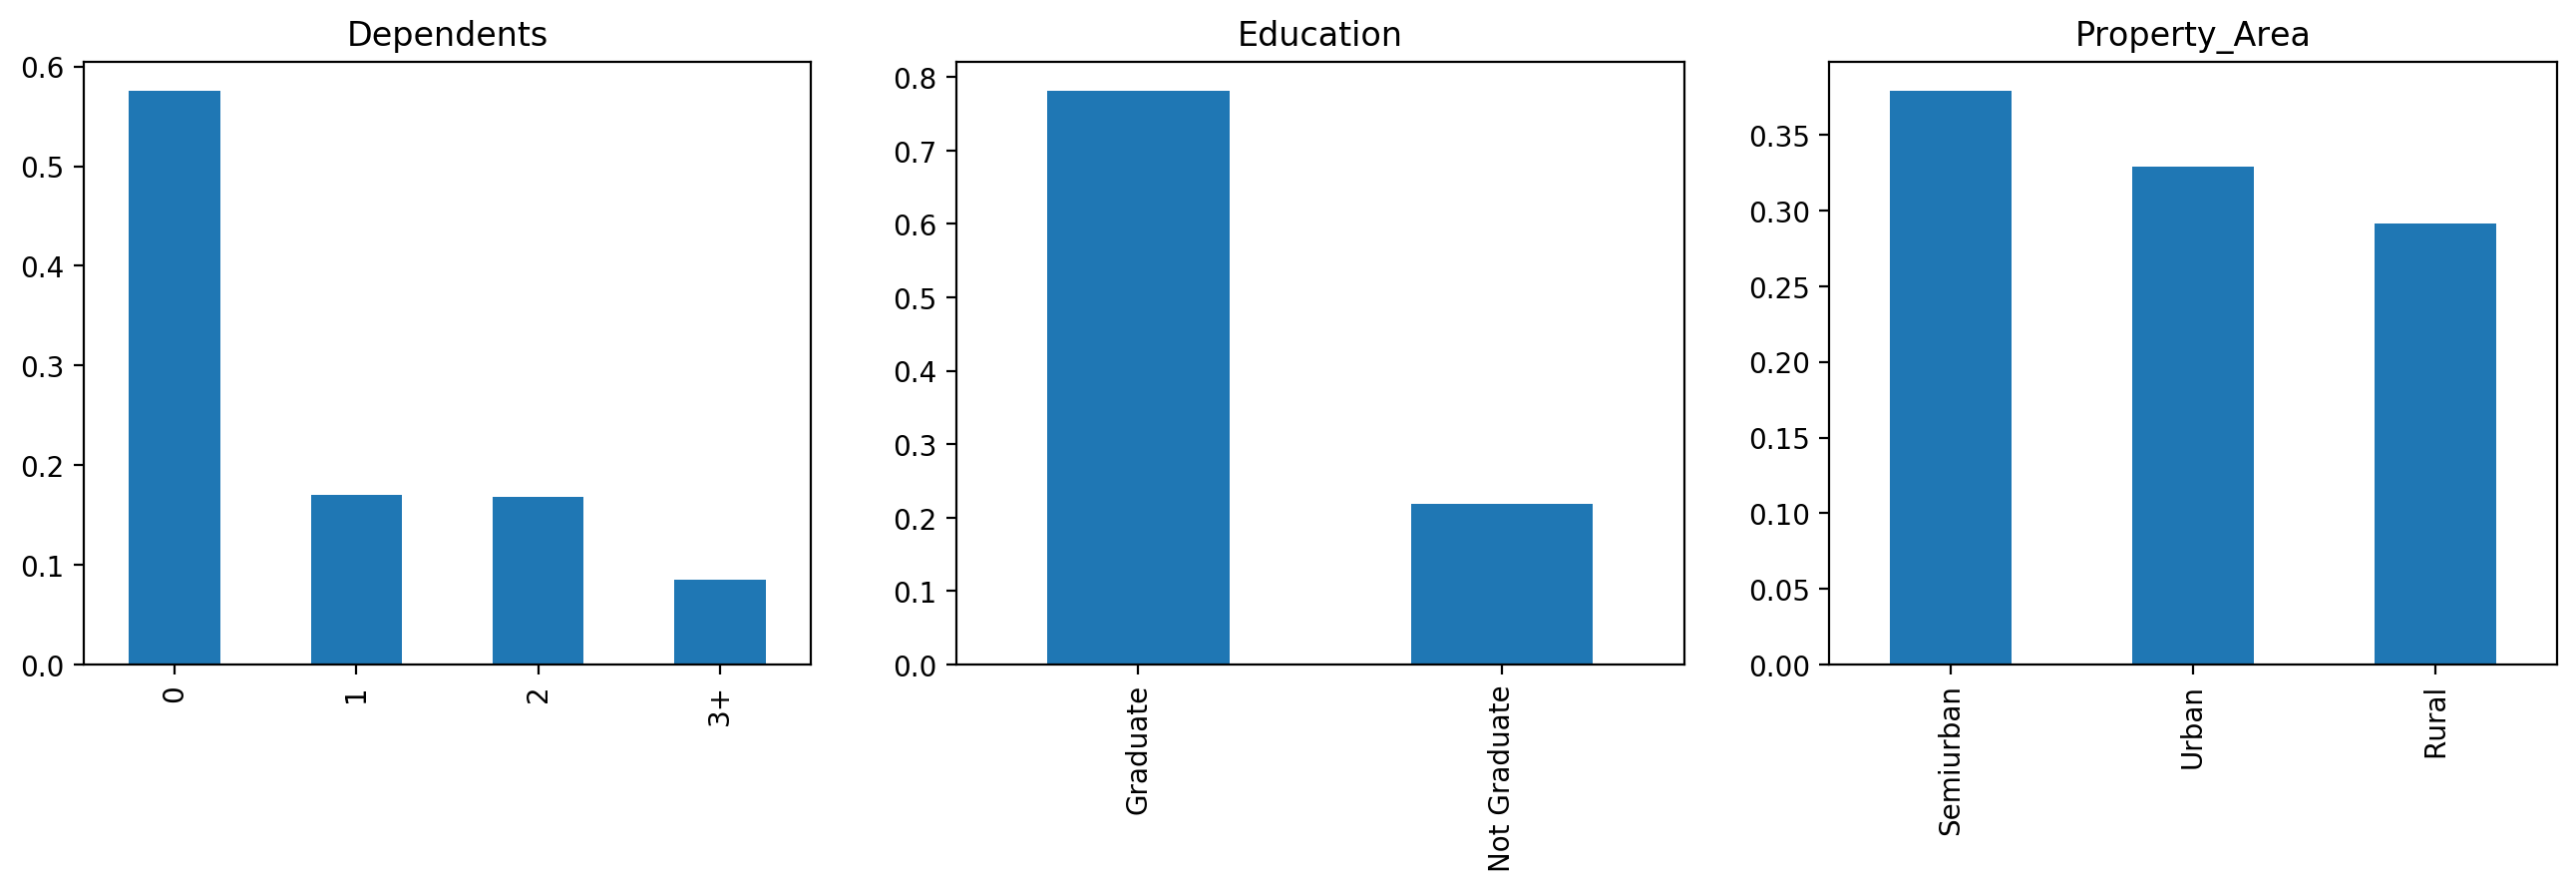

In [13]:
plt.figure(num=1,figsize=(16,4),dpi=200) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:

- Many of the applicants don’t have any dependents (slightly more than 50%).
- Around 80% of the applicants are Graduate.
- Even though many of the applicants are from Semiurban area, there is nearly equal distribution among all categories.

#### Independent Variable (Numerical)

*Applicant Income*

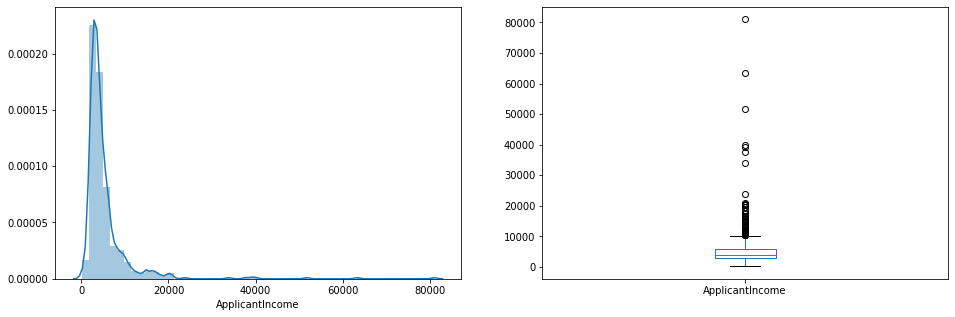

In [14]:
# Till now we have seen the categorical and ordinal values and now lets visualize the numerical variables.
plt.figure(num=2, figsize=(16,5))
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
# sns.boxplot(train['ApplicantIncome'],orient='v')
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Applicant's Income is left skewed with few outliers with higher incomes. Therfore, it is not normally distrubation.

The boxplot confirms the presence of a lot of outliers. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

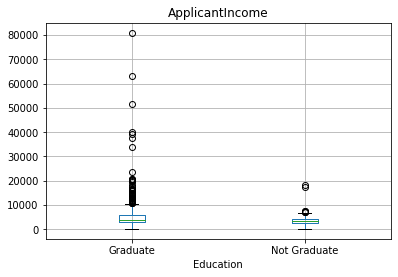

In [15]:
train.boxplot(column='ApplicantIncome', by ='Education')
plt.suptitle('')

We can see that there are a many graduates with very high incomes, which are appearing to be the outliers.

*Co-Applicant Income*

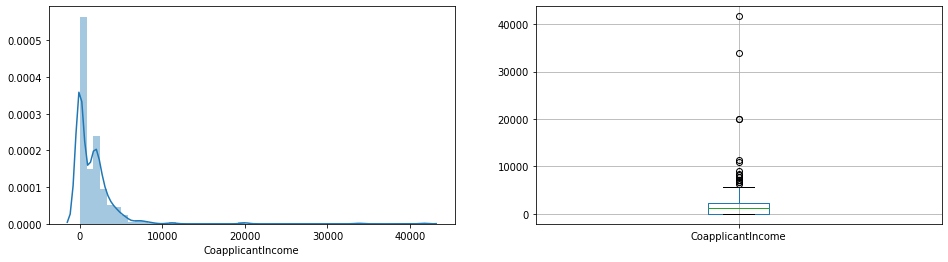

In [16]:
plt.figure(3,figsize=(16,4))
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train.boxplot('CoapplicantIncome')

We see a similar left skewed distribution as that of the applicant income. Majority of coapplicant’s income ranges between 0 and 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

*LoanAmount*

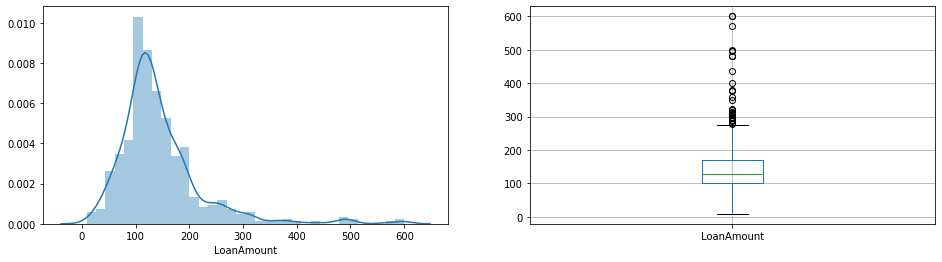

In [17]:
df=train.dropna()
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df.boxplot('LoanAmount')

While the distribution is fairly normal, there are many outliers in this column.

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### Bivariate Analysis

#### Categorical Independent Variable vs Target Variable
Let us find the relation between target variable and categorical independent variables. First, we will look at the count plot which will give us the proportion of approved and unapproved loans.

*Gender*, *Married*, *Dependents*, *Education*, *Self_Employed*, *Credit_History*, *Property_Area*

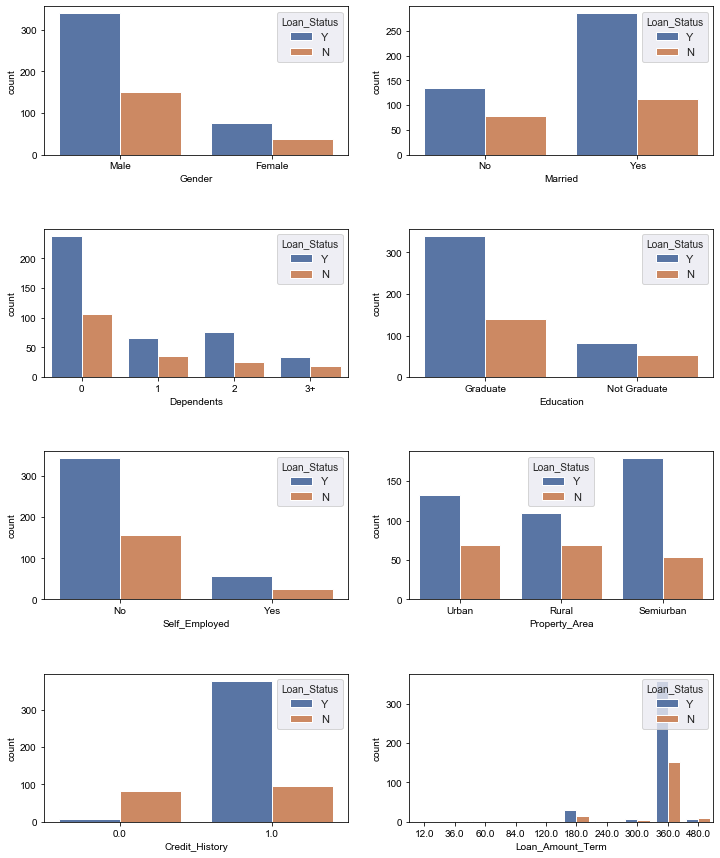

In [18]:
fig, axes = plt.subplots(4,2,figsize=(12,15))

sns.set(style="darkgrid")

for idx, cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col, data=train, hue='Loan_Status', ax=axes[row,col])

plt.subplots_adjust(hspace=0.5)

From the above plots we can infer below observations: 

that, proportion of male and female applicants is almost same for both approved and unapproved loans.

**Loan Approval Status:** About 2/3rd of applicants have been granted loan.

**Sex:** There are more Men than Women (approx. 3x)

**Martial Status:** 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

**Dependents:** Majority of the population have zero dependents and are also likely to accepted for loan.

**Education:** About 5/6th of the population is Graduate and graduates have higher propotion of loan approval

**Employment:** 5/6th of population is not self employed.

**Property Area:** More applicants from Semi-urban and also likely to be granted loans.

**Credit HIstory:** Applicant with credit history are far more likely to be accepted.

**Loan Amount Term:** Majority of the loans taken are for 360 Months (30 years).

Let us understand Numerical columns also

In [19]:
print(train[numerical_columns].describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


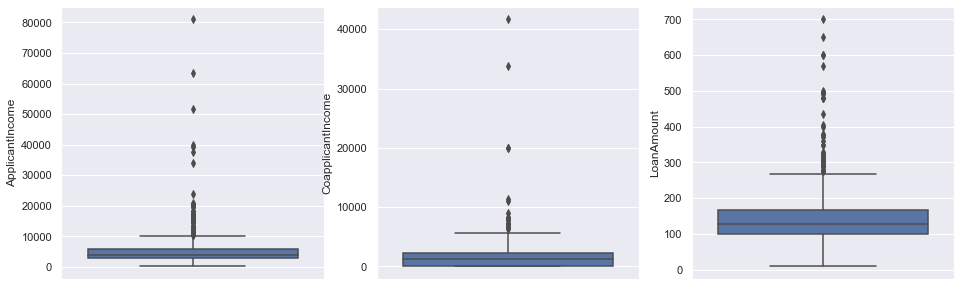

In [20]:
fig,axes = plt.subplots(1,3,figsize=(16,5))

for idx, num_col in enumerate(numerical_columns):
    sns.boxplot(data=train, y=num_col, hue='Loan_Status', ax=axes[idx])

plt.subplots_adjust(hspace=0.5)

#### Plot the correaltion heatmap

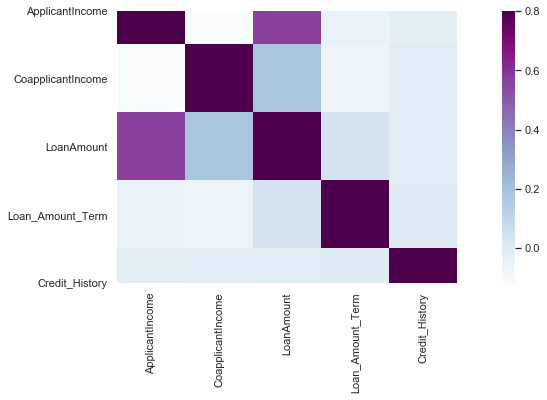

In [21]:
corr_matrix = train.corr() 
plt.subplots(figsize=(16, 5))
sns.heatmap(corr_matrix, vmax=.8, square=True, cmap="BuPu");

Inferences:

Highly correlated variables are...

- ApplicantIncome and LoanAmount

- Credit_History and Loan_Status

- CoapplicantIncome and LoanAmount

### Missing Value Treatment

In [22]:
# Let’s list out feature-wise count of missing values.

train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

- **For numerical variables:** imputation using mean or median

- **For categorical variables:** imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [23]:
features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for feature in features:
    train[feature].fillna(train[feature].mode()[0], inplace=True) 

**How to fill missing values in Loan_Amount_Term?**

In [24]:
# value count of the Loan amount term variable.
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term feature, the value of 360 is repeating the most. So we will replace the missing values in this feature by the mode of this feature.

In [25]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Since *LoanAmount* feature is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [26]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [27]:
# Now lets check whether all the missing values are filled in the dataset.
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
# Apllying the same methods on test data.
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

### Handling Outliers

As we have seen the previous univariate analysis section, *LoanAmount* feature contains outliers so we have to treat them correctly because the presence of outliers affects the distribution of the data.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

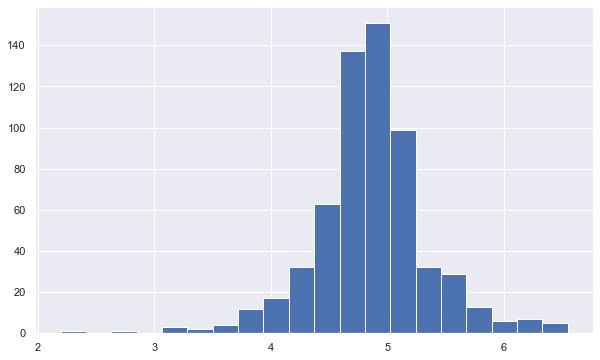

In [29]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
plt.figure(3,figsize=(10,6))
train['LoanAmount_log'].hist(bins=20)
plt.show()

## Build Model

We will use GridSearchCV to find best model and its corresponding best hyperparameters. Also we will be using 5-fold startified cross validation and see the cross validation accuarcy for the selected 3 models. 

- Logistic Regression
- KNN
- RandomForest

Before we build a model, let's create dummy variables for all the categorical variables and encode the target variables.

In [35]:
# Encoding the categorical Target variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X_train = train.drop(['Loan_Status'], axis=1)
y_train = train['Loan_Status']
# Encode for string labels
y_train = label_encoder.fit_transform(y_train)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(test)

In [31]:
from sklearn.preprocessing import StandardScaler

from sklearn import metrics, model_selection, preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

In [33]:
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('l_reg', LogisticRegression(multi_class='auto', random_state=42))])

pipeline_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

pipeline_randomforest = Pipeline([('rf', RandomForestClassifier())])

model_pipeline = [pipeline_lr, pipeline_knn, pipeline_randomforest]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0:'Logistic Regression', 1: 'KNN', 2: 'RandomForest'}


parameters = [
                {
                'l_reg__penalty': ['l1', 'l2'],
                'l_reg__C': np.logspace(0, 4, 10)
                },
                {
                 'knn__n_neighbors': range(1, 20),
                 'knn__weights': ['uniform', 'distance']
                },
                {
                 'rf__n_estimators': [10, 30],
                 'rf__max_features': [0.25, 1.0]
                }
            ]

# fit the pipeline with the training data
for model, pipe in zip(model_pipeline, pipe_dict):
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=parameters[pipe], 
                               cv = model_selection.StratifiedKFold(n_splits=5, shuffle=False, random_state=42)
                              )
    grid_search.fit(X_train, y_train)

    print("{}: model best parameters are --> {}".format(pipe_dict[pipe], grid_search.best_params_))

    print("{}: cv accuracy is  {}".format(pipe_dict[pipe], grid_search.best_score_*100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: model best parameters are --> {'l_reg__C': 1.0, 'l_reg__penalty': 'l1'}
Logistic Regression: cv accuracy is  80.78175895765473


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNN: model best parameters are --> {'knn__n_neighbors': 18, 'knn__weights': 'distance'}
KNN: cv accuracy is  75.2442996742671
RandomForest: model best parameters are --> {'rf__max_features': 1.0, 'rf__n_estimators': 30}
RandomForest: cv accuracy is  77.19869706840392


Logistic Regeressoin is performing better on validation set of data and the selected best 'C' parameter is L1. It implies that target class is linearly sepearble and hence we will buid a logistic model with hyperparameters 'C'=1 and 'penalty' = 'l1'.

Note: Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

After building the model, we shall check the model performance on test data.

In [34]:
model = LogisticRegression(C=1.0, penalty='l1', random_state=1, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_cv = model.predict

In [37]:
pred_test = model.predict(X_test)

In [41]:
submission = label_encoder.inverse_transform(pred_test)

As we have already explored in the prvious segments of univariate and bi-variate analysis, we came up with new features that might affect the target variable. Therefore, we shall now create 3 new features from the exisiting features and then build a model and compare the results.

- Total Income: Applicant Income + Coapplicant Income. If the total income is high, chances of loan approval might also be high.

- EMI: We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term. EMI is the monthly amount to be paid by the applicant to repay the loan. People who have high EMI’s might find it difficult to pay back the loan and hence this variable may have meaningful effect on the target variable.

- Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [42]:
X_train['Total_Income'] = X_train['ApplicantIncome'] + X_train['CoapplicantIncome'] 
X_test['Total_Income'] = X_test['ApplicantIncome'] + X_test['CoapplicantIncome']

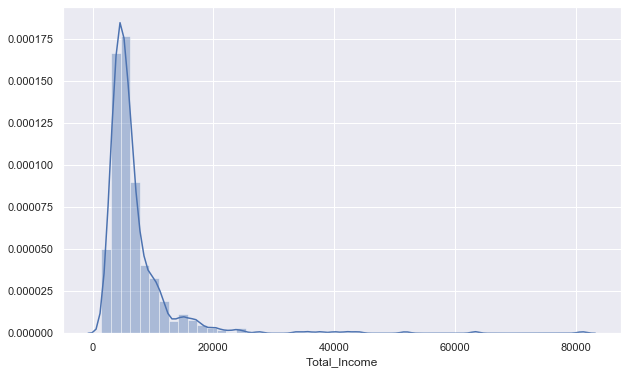

In [43]:
plt.figure(3,figsize=(10,6))
sns.distplot(X_train['Total_Income'])
plt.show()

Since the distribution is right skewed, let’s take the log transformation to make the distribution normal.

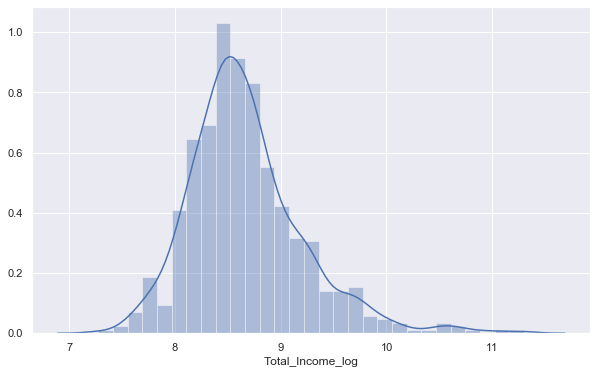

In [44]:
X_train['Total_Income_log'] = np.log(X_train['Total_Income'])
X_test['Total_Income_log'] = np.log(X_test['Total_Income'])

plt.figure(3,figsize=(10,6))
sns.distplot(X_train['Total_Income_log'])
plt.show()

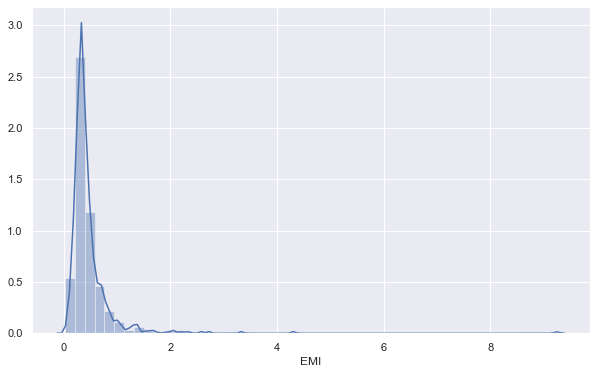

In [45]:
# creating the EMI feature and check the distribution
X_train['EMI'] = X_train['LoanAmount'] / X_train['Loan_Amount_Term']
X_test['EMI'] = X_test['LoanAmount'] / X_test['Loan_Amount_Term']

plt.figure(3,figsize=(10,6))
sns.distplot(X_train['EMI'])
plt.show()

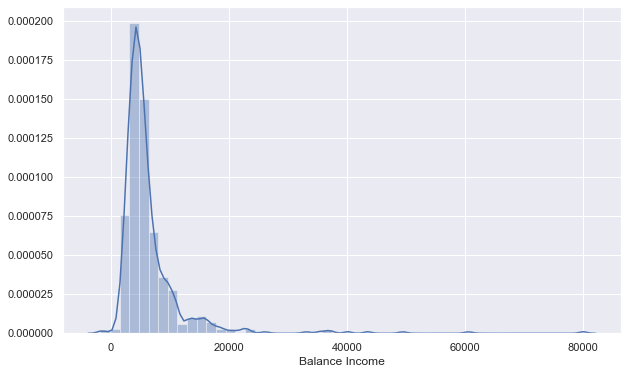

In [47]:
# creating the Balance Income feature and check the distribution
X_train['Balance Income'] = X_train['Total_Income'] - (X_train['EMI']*1000) # Multiplying with 1000 to make the units equal
X_test['Balance Income'] = X_test['Total_Income'] - (X_test['EMI']*1000)

plt.figure(3,figsize=(10,6))
sns.distplot(X_train['Balance Income'])
plt.show()

Let us now drop the variables which we used to create these new features. Because, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [48]:
X_train = X_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
X_test = X_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [50]:
rf_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False)

pipeline_lr = Pipeline([('scaler', StandardScaler()), ('l_reg', LogisticRegression(multi_class='auto', random_state=42))])

pipeline_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

pipeline_randomforest = Pipeline([('rf', RandomForestClassifier())])

model_pipeline = [pipeline_lr, pipeline_knn, pipeline_randomforest]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0:'Logistic Regression', 1: 'KNN', 2: 'RandomForest'}


parameters = [
                {
                'l_reg__penalty': ['l1', 'l2'],
                'l_reg__C': np.logspace(0, 4, 10)
                },
                {
                 'knn__n_neighbors': range(1, 20),
                 'knn__weights': ['uniform', 'distance']
                },
                {
                 'rf__n_estimators': [10, 30],
                 'rf__max_features': [0.25, 1.0]
                }
            ]

# fit the pipeline with the training data
for model, pipe in zip(model_pipeline, pipe_dict):
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=parameters[pipe], 
                               cv = model_selection.StratifiedKFold(n_splits=5, shuffle=False, random_state=42)
                              )
    grid_search.fit(X_train, y_train)

    print("{}: model best parameters are --> {}".format(pipe_dict[pipe], grid_search.best_params_))

    print("{}: cv accuracy is  {}".format(pipe_dict[pipe], grid_search.best_score_*100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Logistic Regression: model best parameters are --> {'l_reg__C': 1.0, 'l_reg__penalty': 'l1'}
Logistic Regression: cv accuracy is  80.78175895765473
KNN: model best parameters are --> {'knn__n_neighbors': 14, 'knn__weights': 'uniform'}
KNN: cv accuracy is  74.5928338762215
RandomForest: model best parameters are --> {'rf__max_features': 0.25, 'rf__n_estimators': 30}
RandomForest: cv accuracy is  77.36156351791531


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
rf_classsifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=3, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,            
min_samples_leaf=1, min_samples_split=2,            
min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,            
oob_score=False, random_state=1, verbose=0, warm_start=False)

rf_classsifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

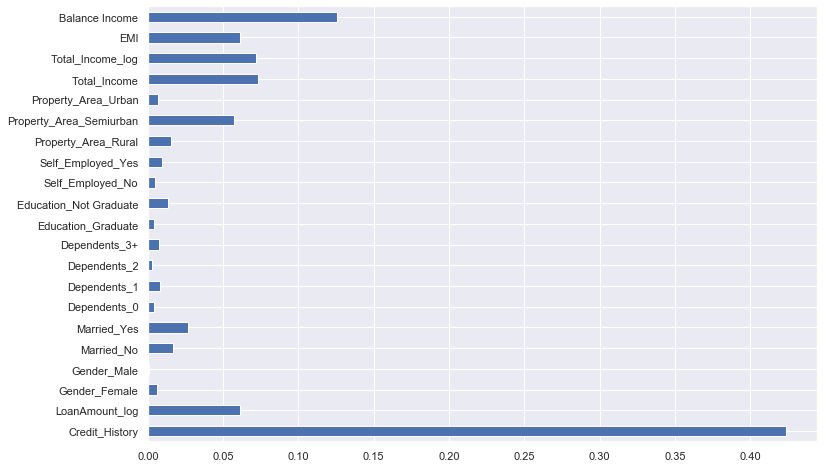

In [54]:
importances=pd.Series(rf_classsifier.feature_importances_, index=X_train.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()